In [1]:
import numpy as np
import pandas as pd
import mlrose_hiive as mlrose
import time
import matplotlib.pyplot as plt

In [2]:
 plt.rcParams.update({'font.size':16})

# MIMIC-flip flop

In [134]:
rhc, ga, sa, mimic = [], [], [], []

for size in range(25, 500, 25):
    fitness = mlrose.FlipFlop()
    problem = mlrose.DiscreteOpt(length=size
                                , fitness_fn = fitness
                                , maximize = True
                                , max_val = 2)
#-----RHC-------------------------------------
    start = time.time()
    rhc_curve = mlrose.random_hill_climb(problem
                                        , restarts=30
                                        , max_attempts=10
                                        , max_iters=size*10
#                                         , init_state=np.array([1])
                                        , curve=True
      
                                        )
    run_time = time.time()-start
    rhc.append([size, run_time, rhc_curve[2][-1,0]
                , rhc_curve[2][-1,1]
                , rhc_curve[2][-1,1]/run_time])
#-----GA----------------------------------------
    start = time.time()
    ga_curve = mlrose.genetic_alg(problem
                                , pop_size=10*size
                                , mutation_prob=0.1
                                , max_attempts=10
                                , max_iters=size*10
#                                 , init_state=np.array([1])
                                , curve=True
      
                                )
    run_time = time.time()-start
    ga.append([size, run_time, ga_curve[2][-1,0]
                , ga_curve[2][-1,1]
                , ga_curve[2][-1,1]/run_time])
#-----SA----------------------------------------
    start = time.time()
    sa_curve = mlrose.simulated_annealing(problem
                                , schedule=mlrose.GeomDecay()
                                , max_attempts=10
                                , max_iters=size*10
#                                 , init_state=np.array([1])
                                , curve=True
      
                                )
    run_time = time.time()-start
    sa.append([size, run_time, sa_curve[2][-1,0]
                , sa_curve[2][-1,1]
                , sa_curve[2][-1,1]/run_time])

#-----MIMIC----------------------------------------
    start = time.time()
    mimic_curve = mlrose.mimic(problem
                        , pop_size=10*size
                        , keep_pct=0.2
                        , max_attempts=10
#                         , init_state=np.array([1])
                        , curve=True
                        , max_iters=size*10
                           )
    run_time = time.time()-start
    mimic.append([size, run_time, mimic_curve[2][-1,0]
                , mimic_curve[2][-1,1]
                , mimic_curve[2][-1,1]/run_time])

In [136]:
# get the running time for each algorithm
rhc_df_time = pd.DataFrame(rhc)[1]
ga_df_time = pd.DataFrame(ga)[1]
sa_df_time = pd.DataFrame(sa)[1]
mimic_df_time = pd.DataFrame(mimic)[1]
df_time = pd.concat([rhc_df_time, ga_df_time, sa_df_time, mimic_df_time],
                   ignore_index=True, axis=1)
df_time.index = range(25, 500, 25)
df_time.columns = ['rhc', 'ga', 'sa', 'mimic']
df_time

,rhc,ga,sa,mimic
25,0.040702,0.175776,0.004013,1.245899
50,0.059014,0.670160,0.022725,7.088159
75,0.093803,1.413581,0.026244,16.151617
100,0.128908,3.113564,0.046515,31.697673
125,0.188979,5.323730,0.060335,65.168555
150,0.202138,6.697511,0.131801,109.983626
175,0.316420,9.008902,0.173938,139.111304
200,0.309906,8.087328,0.229122,207.284554
225,0.330709,25.448628,0.172583,322.067094
250,0.467169,12.050714,0.220796,401.629242


In [ ]:
# relationship between the sample size and the running time

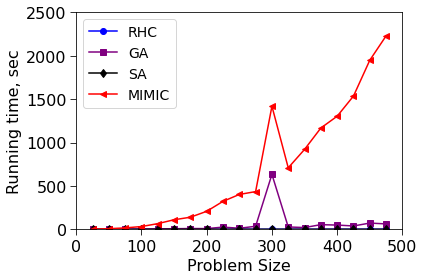

In [144]:
plt.plot(df_time.index, df_time.iloc[:,0]
         , color='blue', marker='o'
         , label='RHC')

plt.plot(df_time.index, df_time.iloc[:,1]
         , color='purple', marker='s'
         , label='GA')

plt.plot(df_time.index, df_time.iloc[:,2]
         , color='black', marker='d'
         , label='SA')

plt.plot(df_time.index, df_time.iloc[:,3]
         , color='red', marker='<'
         , label='MIMIC')
# set the params -----------------------------
ax = plt.gca()
ax.set_xlim(0, 500)
ax.set_ylim(0, 2500)
ax.set_xlabel('Problem Size', fontsize=16)
ax.set_ylabel('Running time, sec', fontsize=16)
plt.tick_params(axis='both', size=6, labelsize=16)
plt.tick_params(axis='both', which='minor', size=4, labelsize=16)

plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig("MIMIC-1.png", dpi=300)
plt.show()

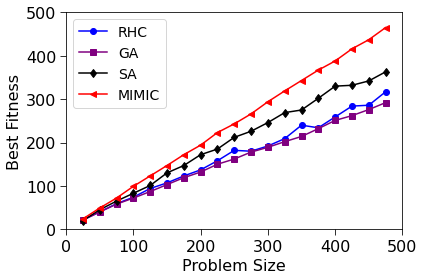

In [148]:
# get the running time for each algorithm
rhc_df_fitness = pd.DataFrame(rhc)[2]
ga_df_fitness = pd.DataFrame(ga)[2]
sa_df_fitness = pd.DataFrame(sa)[2]
mimic_df_fitness = pd.DataFrame(mimic)[2]
df_fitness = pd.concat([rhc_df_fitness, ga_df_fitness
                    , sa_df_fitness, mimic_df_fitness],
                   ignore_index=True, axis=1)
df_fitness.index = range(25, 500, 25)
df_fitness.columns = ['rhc', 'ga', 'sa', 'mimic']
df_fitness

# plot the data

plt.plot(df_fitness.index, df_fitness.iloc[:,0]
         , color='blue', marker='o'
         , label='RHC')

plt.plot(df_fitness.index, df_fitness.iloc[:,1]
         , color='purple', marker='s'
         , label='GA')

plt.plot(df_fitness.index, df_fitness.iloc[:,2]
         , color='black', marker='d'
         , label='SA')

plt.plot(df_fitness.index, df_fitness.iloc[:,3]
         , color='red', marker='<'
         , label='MIMIC')
# set the params -----------------------------
ax = plt.gca()
ax.set_xlim(0, 500)
ax.set_ylim(0, 500)
ax.set_xlabel('Problem Size', fontsize=16)
ax.set_ylabel('Best Fitness', fontsize=16)
plt.tick_params(axis='both', size=6, labelsize=16)
plt.tick_params(axis='both', which='minor', size=4, labelsize=16)

plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig("MIMIC-2.png", dpi=300)
plt.show()

# SA - Continuous Peaks

In [156]:
rhc, ga, sa, mimic = [], [], [], []

for size in range(10, 200, 10):
    fitness = mlrose.ContinuousPeaks(t_pct=0.15)
    problem = mlrose.DiscreteOpt(length=size
                                , fitness_fn = fitness
                                , maximize = True
                                , max_val = 2)
#-----RHC-------------------------------------
    start = time.time()
    rhc_curve = mlrose.random_hill_climb(problem
                                        , restarts=30
                                        , max_attempts=10
                                        , max_iters=size*10
#                                         , init_state=np.array([1])
                                        , curve=True
      
                                        )
    run_time = time.time()-start
    rhc.append([size, run_time, rhc_curve[2][-1,0]
                , rhc_curve[2][-1,1]
                , rhc_curve[2][-1,1]/run_time])
#-----GA----------------------------------------
    start = time.time()
    ga_curve = mlrose.genetic_alg(problem
                                , pop_size=10*size
                                , mutation_prob=0.1
                                , max_attempts=10
                                , max_iters=size*10
#                                 , init_state=np.array([1])
                                , curve=True
      
                                )
    run_time = time.time()-start
    ga.append([size, run_time, ga_curve[2][-1,0]
                , ga_curve[2][-1,1]
                , ga_curve[2][-1,1]/run_time])
#-----SA----------------------------------------
    start = time.time()
    sa_curve = mlrose.simulated_annealing(problem
                                , schedule=mlrose.GeomDecay()
                                , max_attempts=10
                                , max_iters=size*10
#                                 , init_state=np.array([1])
                                , curve=True
      
                                )
    run_time = time.time()-start
    sa.append([size, run_time, sa_curve[2][-1,0]
                , sa_curve[2][-1,1]
                , sa_curve[2][-1,1]/run_time])

#-----MIMIC----------------------------------------
    start = time.time()
    mimic_curve = mlrose.mimic(problem
                        , pop_size=10*size
                        , keep_pct=0.2
                        , max_attempts=10
#                         , init_state=np.array([1])
                        , curve=True
                        , max_iters=size*10
                           )
    run_time = time.time()-start
    mimic.append([size, run_time, mimic_curve[2][-1,0]
                , mimic_curve[2][-1,1]
                , mimic_curve[2][-1,1]/run_time])

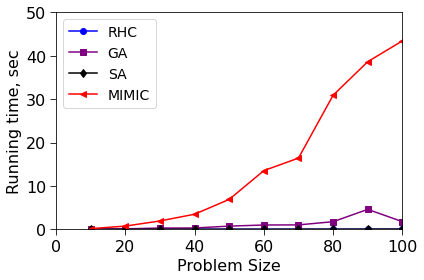

In [163]:
# get the running time for each algorithm
rhc_df_time = pd.DataFrame(rhc)[1]
ga_df_time = pd.DataFrame(ga)[1]
sa_df_time = pd.DataFrame(sa)[1]
mimic_df_time = pd.DataFrame(mimic)[1]
df_time = pd.concat([rhc_df_time, ga_df_time, sa_df_time, mimic_df_time],
                   ignore_index=True, axis=1)
df_time.index = range(10, 200, 10)
df_time.columns = ['rhc', 'ga', 'sa', 'mimic']

plt.plot(df_time.index, df_time.iloc[:,0]
         , color='blue', marker='o'
         , label='RHC')

plt.plot(df_time.index, df_time.iloc[:,1]
         , color='purple', marker='s'
         , label='GA')

plt.plot(df_time.index, df_time.iloc[:,2]
         , color='black', marker='d'
         , label='SA')

plt.plot(df_time.index, df_time.iloc[:,3]
         , color='red', marker='<'
         , label='MIMIC')
# set the params -----------------------------
ax = plt.gca()
ax.set_xlim(0, 100)
ax.set_ylim(0, 50)
ax.set_xlabel('Problem Size', fontsize=16)
ax.set_ylabel('Running time, sec', fontsize=16)
plt.tick_params(axis='both', size=6, labelsize=16)
plt.tick_params(axis='both', which='minor', size=4, labelsize=16)

plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig("SA-1-1.png", dpi=300)
plt.show()

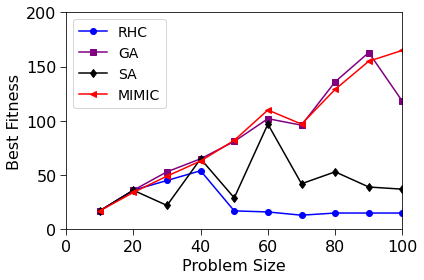

In [162]:
# get the fitness for each algorithm
rhc_df_fitness = pd.DataFrame(rhc)[2]
ga_df_fitness = pd.DataFrame(ga)[2]
sa_df_fitness = pd.DataFrame(sa)[2]
mimic_df_fitness = pd.DataFrame(mimic)[2]
df_fitness = pd.concat([rhc_df_fitness, ga_df_fitness
                    , sa_df_fitness, mimic_df_fitness],
                   ignore_index=True, axis=1)
df_fitness.index = range(10, 200, 10)
df_fitness.columns = ['rhc', 'ga', 'sa', 'mimic']
df_fitness

# plot the data

plt.plot(df_fitness.index, df_fitness.iloc[:,0]
         , color='blue', marker='o'
         , label='RHC')

plt.plot(df_fitness.index, df_fitness.iloc[:,1]
         , color='purple', marker='s'
         , label='GA')

plt.plot(df_fitness.index, df_fitness.iloc[:,2]
         , color='black', marker='d'
         , label='SA')

plt.plot(df_fitness.index, df_fitness.iloc[:,3]
         , color='red', marker='<'
         , label='MIMIC')
# set the params -----------------------------
ax = plt.gca()
ax.set_xlim(0, 100)
ax.set_ylim(0, 200)
ax.set_xlabel('Problem Size', fontsize=16)
ax.set_ylabel('Best Fitness', fontsize=16)
plt.tick_params(axis='both', size=6, labelsize=16)
plt.tick_params(axis='both', which='minor', size=4, labelsize=16)

plt.legend(fontsize=14, loc=2)
plt.tight_layout()
plt.savefig("SA-2-2.png", dpi=300)
plt.show()

# GA - Travelling Salesman

In [170]:
df = pd.read_csv('Towns.csv', sep='\t')
df

,1,Abbeyfeale,52.386,-9.294
0,2,Adare,52.564,-8.790
1,3,Arklow,52.794,-6.165
2,4,Armagh,54.350,-6.655
3,5,Athlone,53.433,-7.950
4,6,Athy,52.992,-6.987
...,...,...,...,...
74,76,Tuam,53.515,-8.851
75,77,Tullamore,53.267,-7.500
76,78,Tullow,52.800,-6.737
77,79,Westport,53.800,-9.533


In [185]:
coords_list = [*zip(df.iloc[:,-2], df.iloc[:,-1])]
len(coords_list)

79

In [187]:
problem = mlrose.TSPOpt(length=79
                        , coords=coords_list
                        , maximize=False)

In [189]:
# GA
T_ga = []
f_ga=[]
for i in range(1, 1000, 50):
    start = time.time()
    ga_curve = mlrose.genetic_alg(problem
                              , mutation_prob = 0.1
                              , max_attempts = 10
#                               , random_state = 1
                              , max_iters=i
                              , curve=True
                                 )
    end = time.time()
    T = end-start
    T_ga.append(T)
    f_ga.append(ga_curve[1])

In [190]:
# RHC
T_rhc = []
f_rhc=[]
for i in range(1, 1000, 50):
    start = time.time()
    rhc_curve = mlrose.random_hill_climb(problem
                                        , restarts=30
                                        , max_attempts=10
                                        , max_iters=i
#                                         , init_state=np.array([1])
                                        , curve=True
                                        )
    end = time.time()
    T = end-start
    T_rhc.append(T)
    f_rhc.append(rhc_curve[1])

In [191]:
# SA
T_sa = []
f_sa=[]
for i in range(1, 1000, 50):
    start = time.time()
    sa_curve = mlrose.simulated_annealing(problem
                                , schedule=mlrose.GeomDecay()
                                , max_attempts=10
                                , max_iters=i
#                                 , init_state=np.array([1])
                                , curve=True
      
                                )
    end = time.time()
    T = end-start
    T_sa.append(T)
    f_sa.append(sa_curve[1])

In [193]:
#MIMIC
T_mimic = []
f_mimic=[]
for i in range(1, 1000, 150):
    mimic_curve = mlrose.mimic(problem
                        , pop_size=10*size
                        , keep_pct=0.2
                        , max_attempts=10
#                         , init_state=np.array([1])
                        , curve=True
                        , max_iters=i
                           )
    end = time.time()
    T = end-start
    T_mimic.append(T)
    f_mimic.append(mimic_curve[1])
    


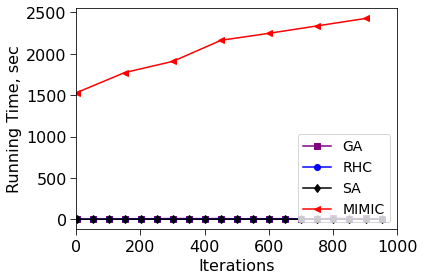

In [204]:
plt.plot(range(1, 1000, 50), T_ga, color='purple', marker='s', label='GA')
plt.plot(range(1, 1000, 50), T_rhc, color='blue', marker='o', label='RHC')
plt.plot(range(1, 1000, 50), T_sa, color='black', marker='d', label='SA')
plt.plot(range(1, 1000, 150), T_mimic, color='red', marker='<', label='MIMIC')

# set the params -----------------------------
ax = plt.gca()
ax.set_xlim(0, 1000)
# ax.set_ylim(0, 200)
ax.set_xlabel('Iterations', fontsize=16)
ax.set_ylabel('Running Time, sec', fontsize=16)
plt.tick_params(axis='both', size=6, labelsize=16)
plt.tick_params(axis='both', which='minor', size=4, labelsize=16)

plt.legend(fontsize=14, loc=4)
plt.tight_layout()
plt.savefig("GA-1-1.png", dpi=300)
plt.show()


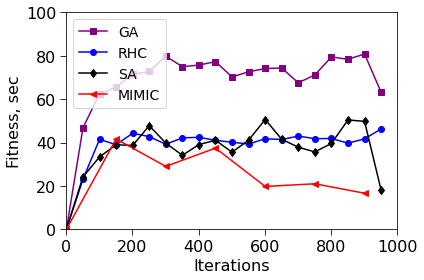

In [203]:
plt.plot(range(1, 1000, 50), -(f_ga-f_ga[0]),color='purple', marker='s', label='GA')
plt.plot(range(1, 1000, 50), -(f_rhc-f_rhc[0]), color='blue', marker='o', label='RHC')
plt.plot(range(1, 1000, 50), -(f_sa-f_sa[0]), color='black', marker='d', label='SA')
plt.plot(range(1, 1000, 150), -(f_mimic-f_mimic[0]), color='red', marker='<', label='MIMIC')

# set the params -----------------------------
ax = plt.gca()
ax.set_xlim(0, 1000)
ax.set_ylim(0, 100)
ax.set_xlabel('Iterations', fontsize=16)
ax.set_ylabel('Fitness, sec', fontsize=16)
plt.tick_params(axis='both', size=6, labelsize=16)
plt.tick_params(axis='both', which='minor', size=4, labelsize=16)

plt.legend(fontsize=14, loc=2)
plt.tight_layout()
plt.savefig("GA-1-2.png", dpi=300)
plt.show()